In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:


# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/CSE/project/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
        'C:/Users/CSE/project/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

In [3]:
validation_generator.class_indices

{'0.Healthy': 0,
 '1.Anthracnose': 1,
 '2.Phytophthora Blight': 2,
 '3.Brown Spot': 3,
 '4.Black Spot': 4,
 '5.others': 5}

In [4]:
model6 = keras.Sequential()

model6.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model6.add(keras.layers.BatchNormalization())  # Batch normalization layer
model6.add(keras.layers.MaxPooling2D((2, 2)))

model6.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(keras.layers.BatchNormalization())  # Batch normalization layer
model6.add(keras.layers.MaxPooling2D((2, 2)))

model6.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(keras.layers.BatchNormalization())  # Batch normalization layer
model6.add(keras.layers.MaxPooling2D((2, 2)))

model6.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model6.add(keras.layers.BatchNormalization())  # Batch normalization layer
model6.add(keras.layers.MaxPooling2D((2, 2)))

model6.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model6.add(keras.layers.BatchNormalization())  # Batch normalization layer
model6.add(keras.layers.MaxPooling2D((2, 2)))

model6.add(keras.layers.Flatten())

model6.add(keras.layers.Dense(512, activation='relu'))
model6.add(keras.layers.BatchNormalization())  # Batch normalization layer
model6.add(keras.layers.Dropout(0.5))
model6.add(keras.layers.Dense(256, activation='relu'))
model6.add(keras.layers.BatchNormalization())  # Batch normalization layer
model6.add(keras.layers.Dropout(0.5))  

model6.add(keras.layers.Dense(6, activation='softmax'))

model6.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])






C:\Users\CSE\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model6.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100


C:\Users\CSE\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 846ms/step - accuracy: 0.3221 - loss: 2.3158 - precision: 0.3504 - recall: 0.2501 - val_accuracy: 0.1667 - val_loss: 11.1442 - val_precision: 0.1667 - val_recall: 0.1667
Epoch 2/100


C:\Users\CSE\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.3421 - loss: 1.9644 - precision: 0.3960 - recall: 0.2587 - val_accuracy: 0.1667 - val_loss: 5.8722 - val_precision: 0.1667 - val_recall: 0.1667
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 815ms/step - accuracy: 0.4247 - loss: 1.6717 - precision: 0.4887 - recall: 0.3258 - val_accuracy: 0.1617 - val_loss: 5.6657 - val_precision: 0.1612 - val_recall: 0.1592
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.4321 - loss: 1.6094 - precision: 0.4947 - recall: 0.3139 - val_accuracy: 0.1850 - val_loss: 4.1571 - val_precision: 0.1877 - val_recall: 0.1575
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 821ms/step - accuracy: 0.4265 - loss: 1.5321 - precision: 0.5241 - recall: 0.3073 - val_accuracy: 0.1908 - val_loss: 3.4218 - val_precision: 0.2071 - val_recall: 0.1808
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.4803 - loss: 1.4282 - precision: 0.5863 - recall: 0.3690 - val_accuracy: 0.2675 - val_

In [8]:
# Evaluate the model on the training dataset
train_loss, train_accuracy, train_recall, train_precision = model6.evaluate(train_generator)

# Evaluate the model on the testing dataset
test_loss, test_accuracy, test_recall, test_precision = model6.evaluate(validation_generator)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 326ms/step - accuracy: 0.8467 - loss: 0.4073 - precision: 0.8717 - recall: 0.8207
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.8555 - loss: 0.4886 - precision: 0.8793 - recall: 0.8285
Training Accuracy: 0.8551282286643982
Testing Accuracy: 0.8374999761581421


In [21]:
model6.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,265,684 (31.53 MB)

 Trainable params: 2,754,054 (10.51 MB)

 Non-trainable params: 3,520 (13.75 KB)

 Optimizer params: 5,508,110 (21.01 MB)

In [25]:
# Save the model to an HDF5 file
model6.save("model.h5")


In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

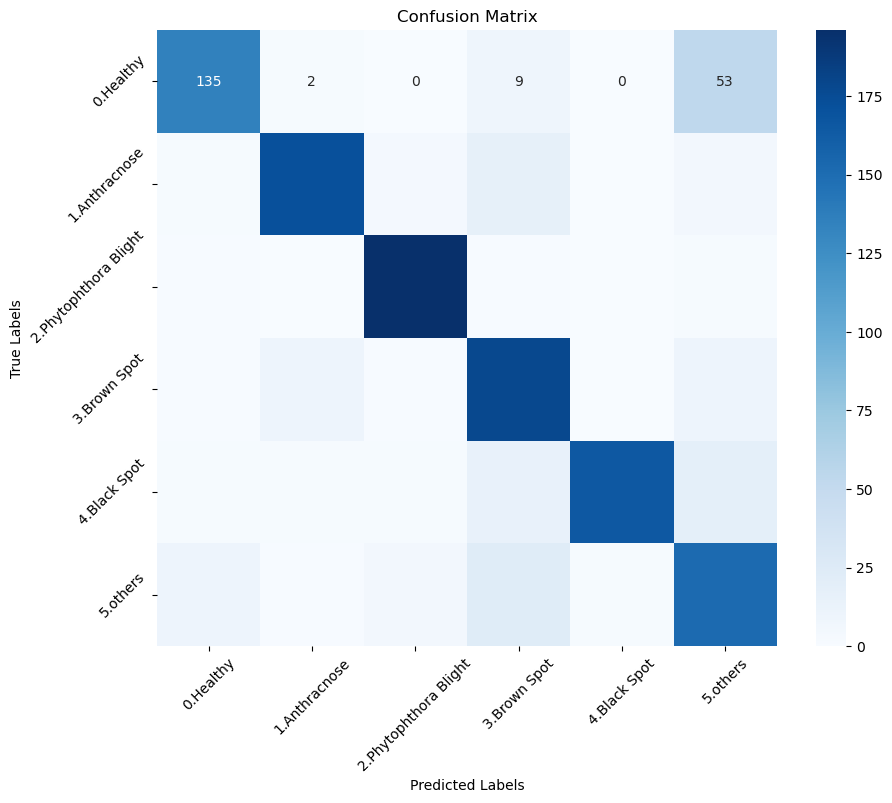

In [37]:



# Get predictions on validation data
true_labels = []
predicted_labels = []

for images, labels in validation_generator:
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(model6.predict(images), axis=1))
    if len(true_labels) >= len(validation_generator.classes):
        break

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices, yticklabels=validation_generator.class_indices)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



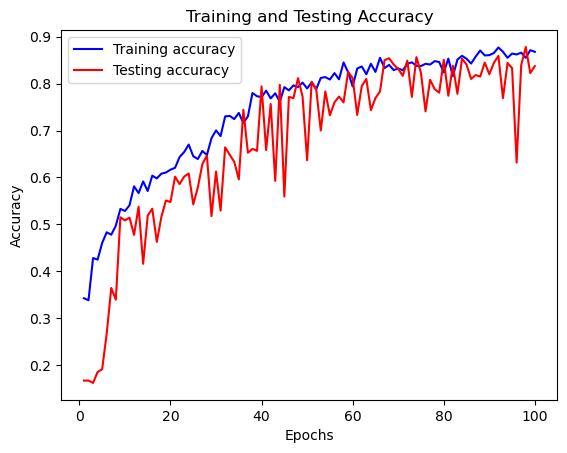

In [42]:
import matplotlib.pyplot as plt

# Get training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# Plot accuracy
plt.plot(epochs, training_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
